In [ ]:
import pandas as pd
import tensorflow as tf
import string
import numpy as np
from pyvi import ViTokenizer, ViPosTagger # thư viện NLP tiếng Việt
from tqdm import tqdm
import numpy as np
import gensim # thư viện NLP
from keras.regularizers import l2



In [ ]:
train_data = pd.read_excel('./train2.xlsx')
train_sentences = train_data['sentence'].tolist()
train_labels = train_data['label'].tolist()

val_data = pd.read_excel('./val2.xlsx')
val_sentences = val_data['sentence'].tolist()
val_labels = val_data['label'].tolist()

test_data = pd.read_excel('./test2.xlsx')
test_sentences = test_data['sentence'].tolist()
test_labels = test_data['label'].tolist()

In [ ]:
def get_data(arr):
    for i in range(0, len(arr)):
        lines = arr[i]
        lines = gensim.utils.simple_preprocess(lines)
        lines = ' '.join(lines)
        lines = ViTokenizer.tokenize(lines)
        arr[i] = lines
    return arr
train_sentences = get_data(train_sentences)
val_sentences = get_data(val_sentences)
test_sentences = get_data(test_sentences)

In [ ]:
def get_data_line(a):
    lines = a
    lines = gensim.utils.simple_preprocess(lines)
    lines = ' '.join(lines)
    lines = ViTokenizer.tokenize(lines)
    return lines

In [ ]:
# Tokenize và chuẩn hóa dữ liệu
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n')
tokenizer.fit_on_texts(train_sentences)

train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)
val_sentences = tokenizer.texts_to_sequences(val_sentences)

max_sequence_length = np.max([len(seq) for seq in train_sequences])


train_sequences = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=max_sequence_length)
test_sequences = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_sequence_length)
val_sentences = tf.keras.preprocessing.sequence.pad_sequences(val_sentences, maxlen=max_sequence_length)

train_sequences = tf.convert_to_tensor(train_sequences)
train_labels = tf.convert_to_tensor(train_labels)

test_sequences = tf.convert_to_tensor(test_sequences)
test_labels = tf.convert_to_tensor(test_labels)

val_sequences = tf.convert_to_tensor(val_sentences)
val_labels = tf.convert_to_tensor(val_labels)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model2_{epoch}.h5', save_freq='epoch')

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_sequence_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# model.summary()

In [ ]:
history = model.fit(train_sequences, train_labels, batch_size=32, epochs=10, validation_data=(val_sequences, val_labels), callbacks=[checkpoint])

Epoch 1/10
72/72 [==============================] - 10s 85ms/step - loss: 0.5299 - accuracy: 0.7260 - val_loss: 0.2873 - val_accuracy: 0.8923
Epoch 2/10
 2/72 [..............................] - ETA: 7s - loss: 0.3783 - accuracy: 0.8750

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


72/72 [==============================] - 1s 18ms/step - loss: 0.1859 - accuracy: 0.9355 - val_loss: 0.2491 - val_accuracy: 0.9085
Epoch 3/10
72/72 [==============================] - 1s 19ms/step - loss: 0.1071 - accuracy: 0.9656 - val_loss: 0.2785 - val_accuracy: 0.8984
Epoch 4/10
72/72 [==============================] - 1s 14ms/step - loss: 0.0638 - accuracy: 0.9769 - val_loss: 0.2919 - val_accuracy: 0.8963
Epoch 5/10
72/72 [==============================] - 1s 14ms/step - loss: 0.0489 - accuracy: 0.9848 - val_loss: 0.2792 - val_accuracy: 0.9207
Epoch 6/10
72/72 [==============================] - 1s 20ms/step - loss: 0.0364 - accuracy: 0.9869 - val_loss: 0.3237 - val_accuracy: 0.9167
Epoch 7/10
72/72 [==============================] - 1s 13ms/step - loss: 0.0246 - accuracy: 0.9917 - val_loss: 0.4074 - val_accuracy: 0.9106
Epoch 8/10
72/72 [==============================] - 1s 20ms/step - loss: 0.0273 - accuracy: 0.9913 - val_loss: 0.3729 - val_accuracy: 0.9106
Epoch 9/10
72/72 [======

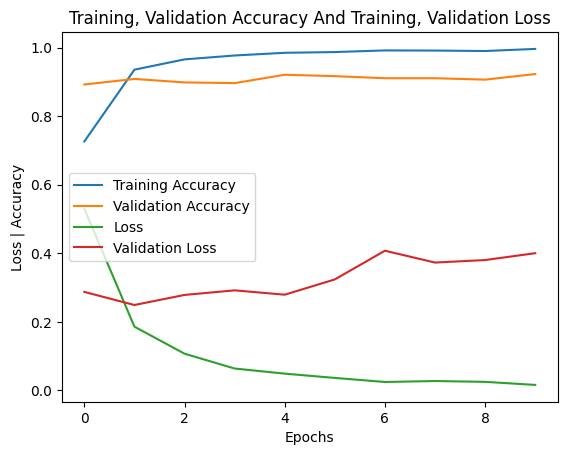

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Tạo một đối tượng figure và axes
fig, ax = plt.subplots()

# Vẽ đồ thị accuracy
ax.plot(accuracy, label='Training Accuracy')
# Vẽ đồ thị val_accuracy
ax.plot(val_accuracy, label='Validation Accuracy')

ax.plot(loss, label='Loss')
ax.plot(val_loss, label='Validation Loss')

# Đặt tiêu đề cho đồ thị và các trục
ax.set_title('Training, Validation Accuracy And Training, Validation Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss | Accuracy')

# Hiển thị chú thích
ax.legend()

# Hiển thị đồ thị
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_sequences, test_labels)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

16/16 [==============================] - 0s 4ms/step - loss: 0.3093 - accuracy: 0.9189
Test loss: 0.3092610836029053
Test accuracy: 0.9188640713691711


In [ ]:
max_test = -1.0
index = 0
for i in range(1, 11):
  model_name = '/content/model2_' + str(i) + '.h5'
  loaded_model = tf.keras.models.load_model(model_name)
  loss, accuracy = loaded_model.evaluate(test_sequences, test_labels)
  print(accuracy)
  if accuracy > max_test:
    print(i)
    max_test = test_accuracy
    index = i
print(index)

16/16 [==============================] - 1s 5ms/step - loss: 0.3015 - accuracy: 0.8864
0.8864097595214844
1
16/16 [==============================] - 1s 5ms/step - loss: 0.2314 - accuracy: 0.9189
0.9188640713691711
16/16 [==============================] - 1s 5ms/step - loss: 0.2387 - accuracy: 0.9229
0.9229208827018738
3
16/16 [==============================] - 1s 4ms/step - loss: 0.2061 - accuracy: 0.9452
0.9452332854270935
4
16/16 [==============================] - 1s 5ms/step - loss: 0.2050 - accuracy: 0.9331
0.9330628514289856
5
16/16 [==============================] - 1s 5ms/step - loss: 0.2242 - accuracy: 0.9310
0.931034505367279
6
16/16 [==============================] - 1s 6ms/step - loss: 0.2993 - accuracy: 0.9148
0.9148073196411133
16/16 [==============================] - 1s 4ms/step - loss: 0.3049 - accuracy: 0.9209
0.9208924770355225
8
16/16 [==============================] - 1s 5ms/step - loss: 0.2290 - accuracy: 0.9290
0.9290060997009277
9
16/16 [==========================